<font color="white">.</font> | <font color="white">.</font> | <font color="white">.</font>
-- | -- | --
![NASA](http://www.nasa.gov/sites/all/themes/custom/nasatwo/images/nasa-logo.svg) | <h1><font size="+3">ASTG Python Courses</font></h1> | ![NASA](https://www.nccs.nasa.gov/sites/default/files/NCCS_Logo_0.png)

---

<center><h1><font color="red" size="+3">Introduction to Pandas</font></h1></center>

## <font color="red">Useful References</font>
- <a href="https://bitbucket.org/hrojas/learn-pandas/src/master/">Learn Pandas</a> (by Hernan Rojas)
- <a href="https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/"> Python Pandas Tutorial: A Complete Introduction for Beginners</a>
- <a href="https://www.python-course.eu/pandas.php">Introduction into Pandas</a>
- <a href="http://earthpy.org/pandas-basics.html">Time series analysis with pandas</a>
- <a href="https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html">Working with Time Series</a>

![fig_logo](https://miro.medium.com/max/3200/1*9v51-jsfHtk6fgAIYLoiHQ.jpeg)
Image Source: pandas.pydata.org

## <font color="red">What is Pandas?</font>
+ `Pandas` is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
+ Some key features:
    - Fast and efficient DataFrame object with default and customized indexing.
    - Tools for loading data into in-memory data objects from different file formats.
    - Data alignment and integrated handling of missing data.
    - Reshaping and pivoting of data sets.
    - Label-based slicing, indexing and subsetting of large data sets.
    - Columns from a data structure can be deleted or inserted.
    - Group by data for aggregation and transformations.
    - High performance merging and joining of data.
    - Time Series functionality.
+ Able to manipulate several <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html">types of files</a>, including CSVs, TSVs , JSONs, HTML, xlsx, HDF5, Python Pickle, among others.
* Is compatible with many of the other data analysis libraries, like Scikit-Learn, Matplotlib, NumPy, and more. 

Some of key features of `Pandas` are captured in the diagram below:

![fig_features](https://d2h0cx97tjks2p.cloudfront.net/blogs/wp-content/uploads/sites/2/2019/04/Python-Pandas-Features.jpg)
Image Source: data-flair.training

### What Will be Covered

1. Pandas data structures
2. Grouby Function
3. Reading remote CSV files and tables.
4. Cleaning and formatting data
5. Manipulating time series data
6. Performing statistical calculations
7. Visualizing the data

In [1]:
import warnings
warnings.filterwarnings("ignore")

### Standard imports

In [2]:
import numpy as np
import datetime
import pandas as pd
print('Using pandas version ',pd.__version__)

Using pandas version  1.1.5


#### Notebook settings

In [4]:
%matplotlib inline

# Only 10 rows of data will be displayed
pd.set_option("max_rows", 10) 

# Print floating point numbers using fixed point notation
np.set_printoptions(suppress=True)

# Set figure size
LARGE_FIGSIZE = (8, 6)

#### Graphics

In [5]:
#from seaborn import set_style
#set_style("darkgrid")
import seaborn as sns
sns.set(style='ticks', context='talk')
import matplotlib.pyplot as plt

## <font color="red">`pandas` Data Structures
- Pandas data structures are similar to numpy ndarrays but with extra functionality.

#### 1D data structures

A <font color='red'>Series</font>  is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the **index**. 

Think of a Series as a cross between a list and a dict.

![title](https://github.com/astg606/py_materials/blob/master/pandas/img/pandas_series.png?raw=1)

A series can be constructed with the `pd.Series` constructor (passing a list or array of values).

In [6]:
my_list = [5, 8, 13, 0.1, -5]

Use a list to create a Numpy array:

In [7]:
a = np.array(my_list)
print(type(a))
print(a)

<class 'numpy.ndarray'>
[ 5.   8.  13.   0.1 -5. ]


Use a list to create a Pandas Series:

In [8]:
sr = pd.Series(my_list)
print(type(sr))
print(sr)

<class 'pandas.core.series.Series'>
0     5.0
1     8.0
2    13.0
3     0.1
4    -5.0
dtype: float64


...get default index values

#### NumPy arrays as backend of Pandas

Contains an array of data:

In [ ]:
sr.values  

Has an associated array of data labels `from 0, N-1`:

In [ ]:
sr.index

In [9]:
my_rows = list(range(5))
print(my_rows)

[0, 1, 2, 3, 4]


In [10]:
sr.index.values 

array([0, 1, 2, 3, 4])

Obtain statistical information:

In [11]:
sr.describe()

count     5.00000
mean      4.22000
std       6.96362
min      -5.00000
25%       0.10000
50%       5.00000
75%       8.00000
max      13.00000
dtype: float64

#### More on the index

Rename the index values:

In [12]:
sr.index = ['A','B','C','D','E']
print(sr)

A     5.0
B     8.0
C    13.0
D     0.1
E    -5.0
dtype: float64


Or pass the index values during Pandas series creation:

In [13]:
sr1 = pd.Series(my_list, index=['A','B','C','D','E'])
print(sr1)

A     5.0
B     8.0
C    13.0
D     0.1
E    -5.0
dtype: float64


#### Numpy Array has an implicitly defined integer index used to access the values while the Pandas Series has an explicitly defined index associated with the values.

Get value at position `n` in series

In [14]:
print(sr[3])  

0.1


Use `iloc` to get value at position `n`

In [15]:
print(sr.iloc[3]) 

0.1


Value at given index using dictionary-like syntax

In [16]:
print(sr.loc['D'])

0.1


#### 2D data structures

Pandas: <font color='red'>DataFrame</font> is a 2-dimensional labeled data structure with columns of potentially different types. It is generally the most commonly used pandas object.

A <font color='red'>DataFrame</font> is like a sequence of aligned <font color='red'>Series</font> objects, i.e. they share the same index.

![title](https://github.com/astg606/py_materials/blob/master/pandas/img/pandas_df.png?raw=1)


A DataFrame can be thought of as a generalization of a two-dimensional NumPy array, where both the rows and columns have a generalized index for accessing the data.

In [17]:
df = pd.DataFrame(data=[[5, True, 'x', 2.7],
                        [8, True, 'y', 3.1],
                        [13,False,'z', np.NaN],
                        [1, False, 'a', 0.1],
                        [-5, True, 'b', -2]],
                  index=['A','B','C','D','E'],
                  columns=['num', 'bool', 'str', 'real'])
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,num,bool,str,real
A,5,True,x,2.7
B,8,True,y,3.1
C,13,False,z,NaN
D,1,False,a,0.1
E,-5,True,b,-2.0


Obtain basic data information:

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, A to E
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   num     5 non-null      int64  
 1   bool    5 non-null      bool   
 2   str     5 non-null      object 
 3   real    4 non-null      float64
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 165.0+ bytes


Obtain statistical information:

In [19]:
df.describe()

,num,real
count,5.000000,4.000000
mean,4.400000,0.975000
std,6.841053,2.387991
min,-5.000000,-2.000000
25%,1.000000,-0.425000
50%,5.000000,1.400000
75%,8.000000,2.800000
max,13.000000,3.100000


Get list of column names:

In [20]:
df.columns

Index(['num', 'bool', 'str', 'real'], dtype='object')

Get the index values:

In [21]:
df.index

Index(['A', 'B', 'C', 'D', 'E'], dtype='object')

Get specific column(s):

In [22]:
df['num']

A     5
B     8
C    13
D     1
E    -5
Name: num, dtype: int64

In [23]:
df.num

A     5
B     8
C    13
D     1
E    -5
Name: num, dtype: int64

In [24]:
df[['num','real']]

,num,real
A,5,2.7
B,8,3.1
C,13,NaN
D,1,0.1
E,-5,-2.0


Get specific row(s):

In [25]:
df.loc['C']

num        13
bool    False
str         z
real      NaN
Name: C, dtype: object

In [26]:
df.loc[['B', 'D']]

,num,bool,str,real
B,8,True,y,3.1
D,1,False,a,0.1


In [27]:
df.loc['A':'E':2]

,num,bool,str,real
A,5,True,x,2.7
C,13,False,z,NaN
E,-5,True,b,-2.0


In [28]:
df.iloc[2]

num        13
bool    False
str         z
real      NaN
Name: C, dtype: object

In [29]:
df.iloc[1:4]

,num,bool,str,real
B,8,True,y,3.1
C,13,False,z,NaN
D,1,False,a,0.1


Get specific row(s) and column(s):

In [30]:
df.loc['A':'D':2, ['num', 'real']]

,num,real
A,5,2.7
C,13,NaN


Apply masking:

In [31]:
df[df.real > 1.0]

,num,bool,str,real
A,5,True,x,2.7
B,8,True,y,3.1


In [32]:
df[df.real == 3.1]

,num,bool,str,real
B,8,True,y,3.1


Problem with `NaN`:
- In Python (and NumPy), the `nan`'s don’t compare to equal. 
- Pandas/NumPy uses the fact that `np.nan != np.nan`, and treats `None` like `np.nan`.
- A scalar equality comparison versus a `None/np.nan` doesn’t provide useful information.

In [33]:
df.real

A    2.7
B    3.1
C    NaN
D    0.1
E   -2.0
Name: real, dtype: float64

In [34]:
df.real == np.NaN

A    False
B    False
C    False
D    False
E    False
Name: real, dtype: bool

We can use the `isnull` method to find out which dataframe entries are '`NaN`.

In [35]:
df.isnull()

,num,bool,str,real
A,False,False,False,False
B,False,False,False,False
C,False,False,False,True
D,False,False,False,False
E,False,False,False,False


In [36]:
df.isnull().values.any()

True

In [37]:
df.isnull().sum()

num     0
bool    0
str     0
real    1
dtype: int64

#### Create a DataFrame from a 2D Numpy array

Given a two-dimensional array of data, we can create a dataframe with any specified column and index names. If left out, an integer index will be used for each.

In [38]:
my_nparray = np.random.rand(3, 2)
print("Numpy array: ", my_nparray)

Numpy array:  [[0.60519014 0.03348679]
 [0.99381174 0.85799078]
 [0.49505797 0.68471353]]


Create a Pandas dataframe using a Numpy array

In [39]:
pddf = pd.DataFrame(my_nparray,
                    columns=['foo', 'bar'],
                    index=['a', 'b', 'c'])
pddf

,foo,bar
a,0.605190,0.033487
b,0.993812,0.857991
c,0.495058,0.684714


Create a Pandas dataframe using Pandas series

In [40]:
pdsr1 = pd.Series(np.random.rand(3))
print("First_Series: \n", pdsr1)

First_Series: 
 0    0.423567
1    0.826043
2    0.619588
dtype: float64


In [41]:
pdsr2 = pd.Series(np.random.rand(3))
print("Second_Series: \n", pdsr2)

Second_Series: 
 0    0.166876
1    0.521758
2    0.821710
dtype: float64


In [42]:
df1 = pd.DataFrame(dict(First_Series = pdsr1, Second_Series = pdsr2))
print(df1)

   First_Series  Second_Series
0      0.423567       0.166876
1      0.826043       0.521758
2      0.619588       0.821710


### <font color='green'>Exercise</font>
In the above Pandas dataframe, relabel the index as `['Row0', 'Row1', 'Row2']`.

**A pandas dataframe can be seen as a collection of pandas series**
![fig_objects](https://doit-test.readthedocs.io/en/latest/_images/base_01_pandas_5_0.png)
Image Source: doit-test.readthedocs.io

## <font color='red'>Pandas Datetime</font>
- Pandas provides a number to tools to handle times series data.
- Pandas datetime methods are used to work with datetime in Pandas.

Generate sequences of fixed-frequency dates and time spans:

In [43]:
dti = pd.date_range('2018-01-01', periods=15, freq='H')
print(type(dti))
dti

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00', '2018-01-01 05:00:00',
               '2018-01-01 06:00:00', '2018-01-01 07:00:00',
               '2018-01-01 08:00:00', '2018-01-01 09:00:00',
               '2018-01-01 10:00:00', '2018-01-01 11:00:00',
               '2018-01-01 12:00:00', '2018-01-01 13:00:00',
               '2018-01-01 14:00:00'],
              dtype='datetime64[ns]', freq='H')

Manipulating and converting date times with timezone information:

In [44]:
dti = dti.tz_localize("UTC")
dti

DatetimeIndex(['2018-01-01 00:00:00+00:00', '2018-01-01 01:00:00+00:00',
               '2018-01-01 02:00:00+00:00', '2018-01-01 03:00:00+00:00',
               '2018-01-01 04:00:00+00:00', '2018-01-01 05:00:00+00:00',
               '2018-01-01 06:00:00+00:00', '2018-01-01 07:00:00+00:00',
               '2018-01-01 08:00:00+00:00', '2018-01-01 09:00:00+00:00',
               '2018-01-01 10:00:00+00:00', '2018-01-01 11:00:00+00:00',
               '2018-01-01 12:00:00+00:00', '2018-01-01 13:00:00+00:00',
               '2018-01-01 14:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='H')

Use the sequence to create a Pandas series:

In [45]:
ts = pd.Series(range(len(dti)), index=dti)
print(ts)

2018-01-01 00:00:00+00:00     0
2018-01-01 01:00:00+00:00     1
2018-01-01 02:00:00+00:00     2
2018-01-01 03:00:00+00:00     3
2018-01-01 04:00:00+00:00     4
                             ..
2018-01-01 10:00:00+00:00    10
2018-01-01 11:00:00+00:00    11
2018-01-01 12:00:00+00:00    12
2018-01-01 13:00:00+00:00    13
2018-01-01 14:00:00+00:00    14
Freq: H, Length: 15, dtype: int64


Resample or convert the time series to a particular frequency:

- Sample every two hours and compute the mean

In [46]:
ts.resample('2H').mean()

2018-01-01 00:00:00+00:00     0.5
2018-01-01 02:00:00+00:00     2.5
2018-01-01 04:00:00+00:00     4.5
2018-01-01 06:00:00+00:00     6.5
2018-01-01 08:00:00+00:00     8.5
2018-01-01 10:00:00+00:00    10.5
2018-01-01 12:00:00+00:00    12.5
2018-01-01 14:00:00+00:00    14.0
Freq: 2H, dtype: float64

Create a Pandas series where the index is the time component:

In [47]:
num_periods = 67
ts = pd.Series(np.random.random(num_periods),
               index=pd.date_range('2000-01', 
                                   periods=num_periods, 
                                   freq='W'))
ts

2000-01-02    0.500259
2000-01-09    0.494231
2000-01-16    0.396583
2000-01-23    0.257383
2000-01-30    0.379653
                ...   
2001-03-11    0.575589
2001-03-18    0.786602
2001-03-25    0.411120
2001-04-01    0.249698
2001-04-08    0.968946
Freq: W-SUN, Length: 67, dtype: float64

Create a Pandas DataFrame where the index is the time component:

In [48]:
num_periods = 2500
df = pd.DataFrame(dict(X = np.random.random(num_periods), 
                       Y = -5+np.random.random(num_periods)),
                  index=pd.date_range('2000', 
                                      periods=num_periods, 
                                      freq='D'))
df

,X,Y
2000-01-01,0.205226,-4.622134
2000-01-02,0.990263,-4.656427
2000-01-03,0.120603,-4.564099
2000-01-04,0.299418,-4.135306
2000-01-05,0.715008,-4.977116
...,...,...
2006-10-31,0.424497,-4.515324
2006-11-01,0.206353,-4.976573
2006-11-02,0.080317,-4.311370
2006-11-03,0.761062,-4.632711


**Resampling**
- The `resample()` function is used to resample time-series data.
- It groups data by a certain time span. 
- You specify a method of how you would like to resample.
- Pandas comes with many in-built options for resampling, and you can even define your own methods.

Here are some time period options:

| Alias | Description |
| --- | --- |
| 'D' |	Calendar day |
| 'W' |	Weekly |
| 'M' |	Month end |
| 'Q' |	Quarter end |
| 'A' |	Year end |

Here are some method options for resampling:

| Method | Description |
| --- | --- |
| max |	Maximum value |
| mean |	Mean of values in time range |
| median |	Median of values in time range |
| min |	Minimum data value |
| sum |	Sum of values |

In [49]:
df.X.resample('Y').mean()

2000-12-31    0.465650
2001-12-31    0.468780
2002-12-31    0.479442
2003-12-31    0.476250
2004-12-31    0.533275
2005-12-31    0.479009
2006-12-31    0.523097
Freq: A-DEC, Name: X, dtype: float64

In [50]:
df.Y.resample('W').sum()

2000-01-02    -9.278561
2000-01-09   -32.588684
2000-01-16   -31.344770
2000-01-23   -31.841488
2000-01-30   -31.622950
                ...    
2006-10-08   -32.340390
2006-10-15   -31.445777
2006-10-22   -30.804203
2006-10-29   -30.142710
2006-11-05   -27.548892
Freq: W-SUN, Name: Y, Length: 358, dtype: float64

In [51]:
df.X.resample('Q').median()

2000-03-31    0.442362
2000-06-30    0.369584
2000-09-30    0.499082
2000-12-31    0.460049
2001-03-31    0.498428
                ...   
2005-12-31    0.488947
2006-03-31    0.460810
2006-06-30    0.545625
2006-09-30    0.581373
2006-12-31    0.527023
Freq: Q-DEC, Name: X, Length: 28, dtype: float64

# <font color="red">Applications</font>

## <font color="blue"> Report on UFO Sightings</font>

In [52]:
url = 'http://bit.ly/uforeports'
df_ufo = pd.read_csv(url)            
df_ufo 

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45


Convert the Time column to datetime format:

In [53]:
df_ufo['Time'] = pd.to_datetime(df_ufo.Time)
df_ufo

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00


Rename the column to Date:

In [54]:
df_ufo.rename(columns={'Time':'Date'}, inplace=True)
df_ufo

,City,Colors Reported,Shape Reported,State,Date
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00


Move the Date column as the dataframe index:

In [55]:
df_ufo = df_ufo.set_index(['Date'])
df_ufo

,City,Colors Reported,Shape Reported,State
Date,,,,
1930-06-01 22:00:00,Ithaca,NaN,TRIANGLE,NY
1930-06-30 20:00:00,Willingboro,NaN,OTHER,NJ
1931-02-15 14:00:00,Holyoke,NaN,OVAL,CO
1931-06-01 13:00:00,Abilene,NaN,DISK,KS
1933-04-18 19:00:00,New York Worlds Fair,NaN,LIGHT,NY
...,...,...,...,...
2000-12-31 23:00:00,Grant Park,NaN,TRIANGLE,IL
2000-12-31 23:00:00,Spirit Lake,NaN,DISK,IA
2000-12-31 23:45:00,Eagle River,NaN,NaN,WI


**Question 1**: How to determine the number of sightings between two dates?

In [56]:
df1 = df_ufo.loc['1978-01-01 09:00:00':'1980-01-01 11:00:00']
df1

,City,Colors Reported,Shape Reported,State
Date,,,,
1978-01-01 13:00:00,Sagle,NaN,SPHERE,ID
1978-01-05 00:00:00,Warwick,RED,SPHERE,RI
1978-01-06 01:00:00,Westport,NaN,OTHER,CA
1978-01-07 02:00:00,Bristol,NaN,NaN,TN
1978-01-09 03:30:00,Chatsworth,NaN,CIRCLE,CA
...,...,...,...,...
1979-12-29 02:00:00,Waterloo,NaN,NaN,IA
1979-12-31 22:35:00,Kansas City,BLUE,CIRCLE,MO
1979-12-31 23:00:00,Spartanburg,NaN,CIRCLE,SC


**Question 2**: How to extract the sightings at a specific month?

In [57]:
df2 = df_ufo[df_ufo.index.month == 2]
df2

,City,Colors Reported,Shape Reported,State
Date,,,,
1931-02-15 14:00:00,Holyoke,NaN,OVAL,CO
1942-02-25 00:00:00,Los Angeles,NaN,NaN,CA
1946-02-01 17:00:00,Merced,NaN,SPHERE,CA
1947-02-20 22:15:00,Syracuse,NaN,DISK,NY
1951-02-03 22:00:00,Thompsonville,NaN,DISK,CT
...,...,...,...,...
2000-02-29 13:35:00,Hawaii's Volcano National Park,NaN,SPHERE,HI
2000-02-29 20:45:00,Las Vegas,NaN,SPHERE,NM
2000-02-29 21:50:00,New Haven,NaN,LIGHT,MI


**Question 3**: How to extract the sightings in a given State?

In [58]:
df3 = df_ufo[df_ufo['State']== 'CA']
df3

,City,Colors Reported,Shape Reported,State
Date,,,,
1935-06-15 00:00:00,Crater Lake,NaN,CIRCLE,CA
1937-08-15 21:00:00,Fontana,NaN,LIGHT,CA
1941-07-02 11:30:00,Forest Home,NaN,CIRCLE,CA
1942-02-25 00:00:00,Los Angeles,NaN,NaN,CA
1944-01-01 12:00:00,San Diego,NaN,CIGAR,CA
...,...,...,...,...
2000-12-30 22:00:00,San Francisco,NaN,FORMATION,CA
2000-12-30 22:00:00,San Francisco,NaN,TRIANGLE,CA
2000-12-31 20:00:00,Pismo Beach,NaN,OVAL,CA


**Question 4**: How to count the number of sightings in each state?

In [59]:
df_ufo.groupby(['State']).count()

,City,Colors Reported,Shape Reported
State,,,
AK,116,25,99
AL,193,21,173
AR,206,26,186
AZ,736,145,644
CA,2525,457,2148
...,...,...,...
VT,44,6,34
WA,1320,269,925
WI,357,63,312


## <font color="blue">Population Data</font>

### Using the `groupby` Function and Related Functions to Aggregate

Read data from url as pandas dataframe:

In [60]:
pop_url = 'http://bit.ly/2cLzoxH'

pop_data = pd.read_csv(pop_url)
pop_data

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623


Convert the `year` values as datetime objects and make the `year` as index:

In [61]:
pop_data['year'] = pd.to_datetime(pop_data.year, format="%Y")
pop_data.rename(columns={'year':'Year'}, inplace=True)
pop_data = pop_data.set_index(['Year'])
pop_data

,country,pop,continent,lifeExp,gdpPercap
Year,,,,,
1952-01-01,Afghanistan,8425333.0,Asia,28.801,779.445314
1957-01-01,Afghanistan,9240934.0,Asia,30.332,820.853030
1962-01-01,Afghanistan,10267083.0,Asia,31.997,853.100710
1967-01-01,Afghanistan,11537966.0,Asia,34.020,836.197138
1972-01-01,Afghanistan,13079460.0,Asia,36.088,739.981106
...,...,...,...,...,...
1987-01-01,Zimbabwe,9216418.0,Africa,62.351,706.157306
1992-01-01,Zimbabwe,10704340.0,Africa,60.377,693.420786
1997-01-01,Zimbabwe,11404948.0,Africa,46.809,792.449960


We want to create a new dataframe by selecting the `continent` and `pop` columns only:

In [62]:
continent_pop = pop_data[['continent', 'pop']]
continent_pop

,continent,pop
Year,,
1952-01-01,Asia,8425333.0
1957-01-01,Asia,9240934.0
1962-01-01,Asia,10267083.0
1967-01-01,Asia,11537966.0
1972-01-01,Asia,13079460.0
...,...,...
1987-01-01,Africa,9216418.0
1992-01-01,Africa,10704340.0
1997-01-01,Africa,11404948.0


### Pandas `groupby()` Function

- It is used to group rows that have the smae values.
- It is used with **aggregate functions** (`count`, `sum`, `min`, `max`, `mean`) to get the statistics based on one or more column values.
- It is also called **Split-Apply-Combine** process:
    - The `groupby()` function splits the data into groups based on some criteria.
    - The aggregate function is applied to each of the groups.
    - The groups are combined together to create a new DataFrame.

In [63]:
grouped_pop = continent_pop.groupby("continent")
grouped_pop

How could then print the new DataFrame?

In [64]:
grouped_pop.head()

,continent,pop
Year,,
1952-01-01,Asia,8425333.0
1957-01-01,Asia,9240934.0
1962-01-01,Asia,10267083.0
1967-01-01,Asia,11537966.0
1972-01-01,Asia,13079460.0
...,...,...
1952-01-01,Oceania,8691212.0
1957-01-01,Oceania,9712569.0
1962-01-01,Oceania,10794968.0


Obtain statistical description:

In [65]:
grouped_pop.describe()

pop                ...                           
           count          mean  ...          75%           max
continent                       ...                           
Africa     624.0  9.916003e+06  ...  10801489.75  1.350312e+08
Americas   300.0  2.450479e+07  ...  18340309.00  3.011399e+08
Asia       396.0  7.703872e+07  ...  46300348.00  1.318683e+09
Europe     360.0  1.716976e+07  ...  21802867.00  8.240100e+07
Oceania     24.0  8.874672e+06  ...  14351625.00  2.043418e+07

[5 rows x 8 columns]

**Iterating through Groups**

In [66]:
for key, item in grouped_pop:
    print(key)
    print(item)

Africa
           continent         pop
Year                            
1952-01-01    Africa   9279525.0
1957-01-01    Africa  10270856.0
1962-01-01    Africa  11000948.0
1967-01-01    Africa  12760499.0
1972-01-01    Africa  14760787.0
...              ...         ...
1987-01-01    Africa   9216418.0
1992-01-01    Africa  10704340.0
1997-01-01    Africa  11404948.0
2002-01-01    Africa  11926563.0
2007-01-01    Africa  12311143.0

[624 rows x 2 columns]
Americas
           continent         pop
Year                            
1952-01-01  Americas  17876956.0
1957-01-01  Americas  19610538.0
1962-01-01  Americas  21283783.0
1967-01-01  Americas  22934225.0
1972-01-01  Americas  24779799.0
...              ...         ...
1987-01-01  Americas  17910182.0
1992-01-01  Americas  20265563.0
1997-01-01  Americas  22374398.0
2002-01-01  Americas  24287670.0
2007-01-01  Americas  26084662.0

[300 rows x 2 columns]
Asia
           continent         pop
Year                            
1952-01

#### Selecting a Group

A single group can be selected using `get_group()`:

In [67]:
grouped_pop.get_group('Oceania')

,continent,pop
Year,,
1952-01-01,Oceania,8691212.0
1957-01-01,Oceania,9712569.0
1962-01-01,Oceania,10794968.0
1967-01-01,Oceania,11872264.0
1972-01-01,Oceania,13177000.0
...,...,...
1987-01-01,Oceania,3317166.0
1992-01-01,Oceania,3437674.0
1997-01-01,Oceania,3676187.0


#### Functions To Aggregate

**`mean()`** computes mean values for each group:

In [ ]:
grouped_pop.aggregate(np.mean)

In [ ]:
grouped_pop.mean()

**`sum()`** adds of values within each group.

In [ ]:
grouped_pop.aggregate(np.sum)

In [ ]:
grouped_pop.sum()

**`size()`** computes the size per each group.

In [ ]:
grouped_pop.aggregate(np.size)

In [ ]:
grouped_pop.size()

For each group, you can similarly use:
    
- `count()`: computes the number of values.
- `max()`: gets maximum value.
- `min()`: gets minimum value.
- `std()`: computes standard deviation of the values.
- `var()`: computes variance, an estimate of variability.
- `sem()`: computes standard error of the mean values.

**Applying several functions at once**

In [ ]:
grouped_pop.agg([np.sum, np.mean, np.std])

**`describe()`** computes a quick summary of values per group

In [ ]:
grouped_pop.describe()

**`first()`** gets the first row value within each group.

In [ ]:
grouped_pop.first()

**`last()`** gets the last row value within each group.

In [ ]:
grouped_pop.last()

**`nth()`** gives nth value, in each group.

In [ ]:
grouped_pop.nth(8)

## <font color="blue">AERONET Observations at Goddard</font>

![fig_aeronet](https://www.nasa.gov/images/content/363322main_bamgomas_maps.jpg)
Image Source: NASA

- [AERONET](https://aeronet.gsfc.nasa.gov/) (AErosol RObotic NETwork) is a globally distributed network of identical robotically controlled ground-based sun/sky scanning radiometers. 
- Each instrument measures the intensity of sun and sky light throughout daylight hours from the ultraviolet through the near-infrared. 
- The program provides a longterm, continuous, and accessible public domain database of aerosol optical, microphysical, and radiative properties for aerosol research including, aerosol characterization, validation of satellite retrievals and model predictions, and synergism with other databases.
- Here are some Science benefits of AERONET:
     - AERONET measurements are used to validate and advance algorithm development of satellite retrievals of aerosols.
     - Aerosol transport models use aerosol data from AERONET to validate and improve model algorithms.
     - Aerosol assimilation models as well as weather prediction models use real time AERONET data to improve predictions.
     - Long-term commitment to AERONET sites worldwide provides assessment of the regional climatological impact of aerosols (e.g., aerosol amount, size, and heating or cooling effects).
- Over 840 stations worldwide.
- Here, we analyze the measurements (Aerosol Optical Depth (AOD)) at the [NASA GSFC](https://aeronet.gsfc.nasa.gov/new_web/photo_db_v3/GSFC.html) site.

In [68]:
url = "https://raw.githubusercontent.com/astg606/py_materials/master/aeronet/"
filename = url+"19930101_20210102_GSFC.lev20"

In [69]:
dateparse = lambda x: datetime.datetime.strptime(x, '%d:%m:%Y %H:%M:%S')
df = pd.read_csv(filename, skiprows=6, na_values=-999,
                 parse_dates={'datetime': [0, 1]}, 
                 date_parser=dateparse, index_col=0, 
                 squeeze=True)

In [70]:
df

,Day_of_Year,AOD_1640nm,AOD_1020nm,AOD_870nm,AOD_865nm,AOD_779nm,AOD_675nm,AOD_667nm,AOD_620nm,AOD_560nm,AOD_555nm,AOD_551nm,AOD_532nm,AOD_531nm,AOD_510nm,AOD_500nm,AOD_490nm,AOD_443nm,AOD_440nm,AOD_412nm,AOD_400nm,AOD_380nm,AOD_340nm,Precipitable_Water(cm),AOD_681nm,AOD_709nm,AOD_Empty,AOD_Empty.1,AOD_Empty.2,AOD_Empty.3,AOD_Empty.4,440-870_Angstrom_Exponent,380-500_Angstrom_Exponent,440-675_Angstrom_Exponent,500-870_Angstrom_Exponent,340-440_Angstrom_Exponent,440-675_Angstrom_Exponent[Polar],N[AOD_1640nm],N[AOD_1020nm],N[AOD_870nm],N[AOD_865nm],N[AOD_779nm],N[AOD_675nm],N[AOD_667nm],N[AOD_620nm],N[AOD_560nm],N[AOD_555nm],N[AOD_551nm],N[AOD_532nm],N[AOD_531nm],N[AOD_510nm],N[AOD_500nm],N[AOD_490nm],N[AOD_443nm],N[AOD_440nm],N[AOD_412nm],N[AOD_400nm],N[AOD_380nm],N[AOD_340nm],N[Precipitable_Water(cm)],N[AOD_681nm],N[AOD_709nm],N[AOD_Empty],N[AOD_Empty].1,N[AOD_Empty].2,N[AOD_Empty].3,N[AOD_Empty].4,N[440-870_Angstrom_Exponent],N[380-500_Angstrom_Exponent],N[440-675_Angstrom_Exponent],N[500-870_Angstrom_Exponent],N[340-440_Angstrom_Exponent],N[440-675_Angstrom_Exponent[Polar]],Data_Quality_Level,AERONET_Instrument_Number,AERONET_Site_Name,Site_Latitude(Degrees),Site_Longitude(Degrees),Site_Elevation(m)
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1993-05-14 12:00:00,134,NaN,0.158325,0.178997,NaN,NaN,0.233399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.367211,NaN,NaN,NaN,0.493311,1.283784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.052498,NaN,1.071884,NaN,1.123715,NaN,0,3,3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,3,6,0,0,0,0,0,0,0,3,0,3,0,3,0,lev20,9,GSFC,38.9925,-76.839833,87.0
1993-05-15 12:00:00,135,NaN,0.121314,0.138490,NaN,NaN,0.176759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.293171,NaN,NaN,NaN,0.418627,1.593603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.094614,NaN,1.184610,NaN,1.363007,NaN,0,48,48,0,0,48,0,0,0,0,0,0,0,0,0,0,0,48,0,0,0,48,96,0,0,0,0,0,0,0,48,0,48,0,48,0,lev20,2,GSFC,38.9925,-76.839833,87.0
1993-05-26 12:00:00,146,NaN,0.140392,0.170959,NaN,NaN,0.243861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.436805,NaN,NaN,NaN,0.591956,1.200851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.372727,NaN,1.380384,NaN,1.113184,NaN,0,9,9,0,0,9,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,7,18,0,0,0,0,0,0,0,9,0,9,0,7,0,lev20,2,GSFC,38.9925,-76.839833,87.0
1993-05-27 12:00:00,147,NaN,0.093931,0.108151,NaN,NaN,0.139159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.225286,NaN,NaN,NaN,0.299448,1.319145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.080505,NaN,1.141307,NaN,1.075178,NaN,0,19,19,0,0,19,0,0,0,0,0,0,0,0,0,0,0,19,0,0,0,19,38,0,0,0,0,0,0,0,19,0,19,0,19,0,lev20,2,GSFC,38.9925,-76.839833,87.0
1993-06-16 12:00:00,167,NaN,0.099382,0.107474,NaN,NaN,0.144526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.244953,NaN,NaN,NaN,0.352612,1.512204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.211340,NaN,1.251012,NaN,1.391132,NaN,0,12,12,0,0,12,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,12,24,0,0,0,0,0,0,0,12,0,12,0,12,0,lev20,2,GSFC,38.9925,-76.839833,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-13 12:00:00,257,0.054054,0.079703,0.091395,NaN,NaN,0.114655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156459,NaN,NaN,0.169362,NaN,NaN,0.188036,0.198882,3.628710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.930909,0.676069,0.935218,0.977520,0.653423,NaN,61,61,61,0,0,61,0,0,0,0,0,0,0,0,61,0,0,61,0,0,61,61,61,0,0,0,0,0,0,0,61,61,61,61,61,0,lev20,867,GSFC,38.9925,-76.839833,87.0
2020-09-14 12:00:00,258,0.155274,0.440855,0.587899,NaN,NaN,0.839463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.053957,NaN,NaN,1.077319,NaN,NaN,1.055628,1.001375,1.689183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.945517,0.009747,0.637442,1.093271,-0.218075,NaN,54,54,54,0,0,54,0,0,0,0,0,0,0,0,50,0,0,50,0,0,45,41,53,0,0,0,0,0,0,0,54,50,50,54,45,0,lev20,867,GSFC,38.9925,-76.839833,87.0
2020-0

In [71]:
df.columns

Index(['Day_of_Year', 'AOD_1640nm', 'AOD_1020nm', 'AOD_870nm', 'AOD_865nm',
       'AOD_779nm', 'AOD_675nm', 'AOD_667nm', 'AOD_620nm', 'AOD_560nm',
       'AOD_555nm', 'AOD_551nm', 'AOD_532nm', 'AOD_531nm', 'AOD_510nm',
       'AOD_500nm', 'AOD_490nm', 'AOD_443nm', 'AOD_440nm', 'AOD_412nm',
       'AOD_400nm', 'AOD_380nm', 'AOD_340nm', 'Precipitable_Water(cm)',
       'AOD_681nm', 'AOD_709nm', 'AOD_Empty', 'AOD_Empty.1', 'AOD_Empty.2',
       'AOD_Empty.3', 'AOD_Empty.4', '440-870_Angstrom_Exponent',
       '380-500_Angstrom_Exponent', '440-675_Angstrom_Exponent',
       '500-870_Angstrom_Exponent', '340-440_Angstrom_Exponent',
       '440-675_Angstrom_Exponent[Polar]', 'N[AOD_1640nm]', 'N[AOD_1020nm]',
       'N[AOD_870nm]', 'N[AOD_865nm]', 'N[AOD_779nm]', 'N[AOD_675nm]',
       'N[AOD_667nm]', 'N[AOD_620nm]', 'N[AOD_560nm]', 'N[AOD_555nm]',
       'N[AOD_551nm]', 'N[AOD_532nm]', 'N[AOD_531nm]', 'N[AOD_510nm]',
       'N[AOD_500nm]', 'N[AOD_490nm]', 'N[AOD_443nm]', 'N[AOD_440nm]',
   

In [72]:
df.describe()

,Day_of_Year,AOD_1640nm,AOD_1020nm,AOD_870nm,AOD_865nm,AOD_779nm,AOD_675nm,AOD_667nm,AOD_620nm,AOD_560nm,AOD_555nm,AOD_551nm,AOD_532nm,AOD_531nm,AOD_510nm,AOD_500nm,AOD_490nm,AOD_443nm,AOD_440nm,AOD_412nm,AOD_400nm,AOD_380nm,AOD_340nm,Precipitable_Water(cm),AOD_681nm,AOD_709nm,AOD_Empty,AOD_Empty.1,AOD_Empty.2,AOD_Empty.3,AOD_Empty.4,440-870_Angstrom_Exponent,380-500_Angstrom_Exponent,440-675_Angstrom_Exponent,500-870_Angstrom_Exponent,340-440_Angstrom_Exponent,440-675_Angstrom_Exponent[Polar],N[AOD_1640nm],N[AOD_1020nm],N[AOD_870nm],N[AOD_865nm],N[AOD_779nm],N[AOD_675nm],N[AOD_667nm],N[AOD_620nm],N[AOD_560nm],N[AOD_555nm],N[AOD_551nm],N[AOD_532nm],N[AOD_531nm],N[AOD_510nm],N[AOD_500nm],N[AOD_490nm],N[AOD_443nm],N[AOD_440nm],N[AOD_412nm],N[AOD_400nm],N[AOD_380nm],N[AOD_340nm],N[Precipitable_Water(cm)],N[AOD_681nm],N[AOD_709nm],N[AOD_Empty],N[AOD_Empty].1,N[AOD_Empty].2,N[AOD_Empty].3,N[AOD_Empty].4,N[440-870_Angstrom_Exponent],N[380-500_Angstrom_Exponent],N[440-675_Angstrom_Exponent],N[500-870_Angstrom_Exponent],N[340-440_Angstrom_Exponent],N[440-675_Angstrom_Exponent[Polar]],AERONET_Instrument_Number,Site_Latitude(Degrees),Site_Longitude(Degrees),Site_Elevation(m)
count,6835.000000,3098.000000,6808.000000,6828.000000,0.0,0.0,6829.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6574.000000,0.0,0.0,6826.000000,0.0,0.0,6732.000000,6786.000000,6833.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6834.000000,6578.000000,6832.000000,6582.000000,6818.000000,0.0,6835.000000,6835.000000,6835.000000,6835.0,6835.0,6835.000000,6835.0,6835.0,6835.0,6835.0,6835.0,6835.0,6835.0,6835.0,6835.000000,6835.0,6835.0,6835.000000,6835.0,6835.0,6835.000000,6835.000000,6835.000000,6835.0,6835.0,6835.0,6835.0,6835.0,6835.0,6835.0,6835.000000,6835.000000,6835.000000,6835.000000,6835.000000,6835.0,6835.000000,6.835000e+03,6.835000e+03,6835.0
mean,183.288222,0.028640,0.066374,0.085221,NaN,NaN,0.127981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.205155,NaN,NaN,0.249161,NaN,NaN,0.300926,0.335537,1.771418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.596767,1.476421,1.630222,1.614336,1.301442,NaN,15.175274,28.936064,29.090271,0.0,0.0,29.104462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.367374,0.0,0.0,29.046233,0.0,0.0,28.562399,28.341917,29.826920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.131675,28.357571,29.096708,28.423555,28.865984,0.0,291.269203,3.899250e+01,-7.683983e+01,87.0
std,99.456276,0.023900,0.067646,0.088718,NaN,NaN,0.136203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204038,NaN,NaN,0.241306,NaN,NaN,0.276747,0.299586,1.175574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.290072,0.288241,0.280315,0.312650,0.310669,NaN,25.675316,24.304168,24.304813,0.0,0.0,24.294564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.686760,0.0,0.0,24.299472,0.0,0.0,24.410756,24.193451,24.755404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.295143,24.674385,24.291618,24.688599,24.280062,0.0,314.787042,5.194447e-12,9.976750e-12,0.0
min,1.000000,0.002036,0.000495,0.007140,NaN,NaN,0.009928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.018561,NaN,NaN,0.022667,NaN,NaN,0.025061,0.026769,0.109284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.306446,-0.108796,0.385849,0.281823,-0.340003,NaN,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.000000,3.899250e+01,-7.683983e+01,87.0
25%,101.000000,0.013154,0.026675,0.033775,NaN,NaN,0.048858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.079389,NaN,NaN,0.097435,NaN,NaN,0.121242,0.136328,0.750127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.420936,1.308061,1.459639,1.418279,1.113009,NaN,0.000000,10.000000,10.000000,0.0,0.0,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.000000,0.0,0.0,10.000000,0.0,0.0,9.000000,9.000000,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.000000,8.000000,10.000000,8.000000,10.000000,0.0,89.000000,3.899250e+01,-7.683983e+01,87.0
50%,185.000000,0.022177,0.045413,0.057267,NaN,NaN,0.082602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.135489,NaN,NaN,0.165599,NaN,NaN,0.205503,0.234168,1.497446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.633879,1.485924,1.

**Renaming of the Columns of Interest**

In [73]:
old_cols = ['Day_of_Year', 'AOD_675nm', 'AOD_440nm', 
            '440-675_Angstrom_Exponent']

new_cols = ['DoY', 'A675', 'A440', 'Alpha']

In [74]:
df_GSFC = df[old_cols]
df_GSFC.columns = new_cols

In [75]:
df_GSFC

,DoY,A675,A440,Alpha
datetime,,,,
1993-05-14 12:00:00,134,0.233399,0.367211,1.071884
1993-05-15 12:00:00,135,0.176759,0.293171,1.184610
1993-05-26 12:00:00,146,0.243861,0.436805,1.380384
1993-05-27 12:00:00,147,0.139159,0.225286,1.141307
1993-06-16 12:00:00,167,0.144526,0.244953,1.251012
...,...,...,...,...
2020-09-13 12:00:00,257,0.114655,0.169362,0.935218
2020-09-14 12:00:00,258,0.839463,1.077319,0.637442
2020-09-15 12:00:00,259,0.895112,1.086167,0.555824


**Plotting**

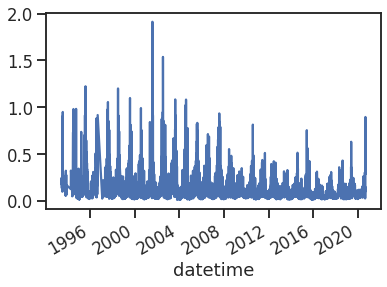

In [76]:
df_GSFC["A675"].plot()

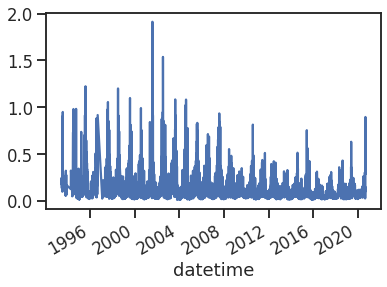

In [77]:
df_GSFC["A675"].plot()

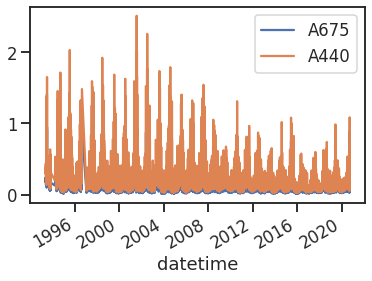

In [78]:
df_GSFC[["A675", "A440"]].plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9232ad0a50>,
      dtype=object)

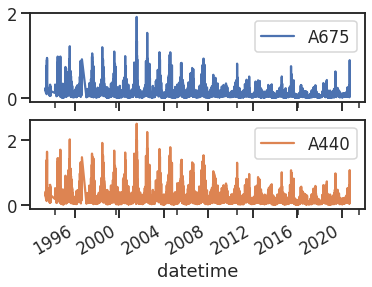

In [79]:
df_GSFC[["A675", "A440"]].plot(subplots='True')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


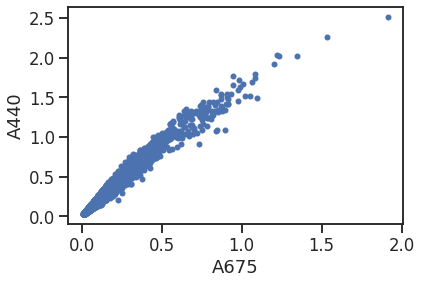

In [80]:
df_GSFC.plot(kind='scatter', x="A675", y="A440");

**Perform Calculations**

We create a new column that is a combination of other columns.

In [81]:
df_GSFC['A550'] = df_GSFC['A675']*((675.0/550.0))**df_GSFC['Alpha']

In [82]:
df_GSFC

,DoY,A675,A440,Alpha,A550
datetime,,,,,
1993-05-14 12:00:00,134,0.233399,0.367211,1.071884,0.290692
1993-05-15 12:00:00,135,0.176759,0.293171,1.184610,0.225290
1993-05-26 12:00:00,146,0.243861,0.436805,1.380384,0.323530
1993-05-27 12:00:00,147,0.139159,0.225286,1.141307,0.175801
1993-06-16 12:00:00,167,0.144526,0.244953,1.251012,0.186729
...,...,...,...,...,...
2020-09-13 12:00:00,257,0.114655,0.169362,0.935218,0.138858
2020-09-14 12:00:00,258,0.839463,1.077319,0.637442,0.956525
2020-09-15 12:00:00,259,0.895112,1.086167,0.555824,1.003028


The above is used to compare model simulation with AERONET observations.

**Zoom in on a Specific Year**

In [83]:
df_GSFC_2010 = df_GSFC[df_GSFC.index.year == 2010]
df_GSFC_2010

,DoY,A675,A440,Alpha,A550
datetime,,,,,
2010-01-01 12:00:00,1,0.076400,0.157641,1.740753,0.109123
2010-01-02 12:00:00,2,0.058369,0.090823,1.095615,0.073051
2010-01-03 12:00:00,3,0.057466,0.098882,1.324272,0.075369
2010-01-05 12:00:00,5,0.073843,0.109090,0.992737,0.090491
2010-01-07 12:00:00,7,0.047633,0.096994,1.706229,0.067556
...,...,...,...,...,...
2010-12-24 12:00:00,358,0.023626,0.041898,1.460114,0.031861
2010-12-27 12:00:00,361,0.026399,0.034910,0.737149,0.030701
2010-12-28 12:00:00,362,0.024232,0.048286,1.675986,0.034155


Text(0, 0.5, 'Aerosol Optical Depth')

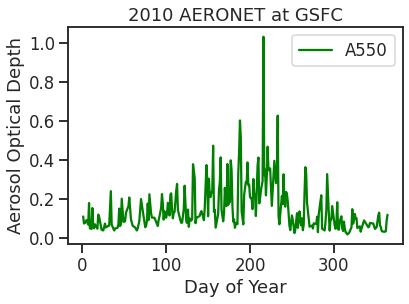

In [84]:
ax = df_GSFC_2010.plot(x="DoY", y="A550", color="green",
                       title="2010 AERONET at GSFC")
ax.set_xlabel("Day of Year")
ax.set_ylabel("Aerosol Optical Depth")

## <font color="blue">Weather Data</font>

<center>https://www.wunderground.com/cgi-bin/findweather/getForecast?query=KDAA</center>

#### Pandas <font color='red'>read_csv</font>

In [85]:
url = "https://raw.githubusercontent.com/astg606/py_materials/master/pandas/data/weather/"
filename = "hampton_10-10-15_10-10-16.csv"
weather_data = pd.read_csv(url+filename)

Print the data as a table:

In [86]:
weather_data

,EDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,Mean Sea Level PressureIn,Min Sea Level PressureIn,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2015-10-10,67,64,58,64,57,50,94,78,64,30.11,30.04,29.95,10,10,8,24,13,29.0,0.00,7,Rain,15
1,2015-10-11,68,62,54,56,54,51,89,76,64,30.03,29.97,29.92,10,10,9,14,11,18.0,0.00,5,NaN,14
2,2015-10-12,74,62,52,62,56,51,96,80,45,29.92,29.85,29.74,10,10,9,9,4,NaN,0.00,1,NaN,108
3,2015-10-13,75,69,63,63,61,59,87,75,60,29.73,29.68,29.62,10,10,9,20,12,24.0,0.00,1,NaN,211
4,2015-10-14,74,64,56,62,54,50,96,71,46,29.95,29.84,29.74,10,10,10,13,7,20.0,0.00,1,NaN,314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-10-6,72,69,66,68,65,61,94,88,80,30.23,30.20,30.18,10,10,10,18,14,23.0,0.01,8,Rain,44
363,2016-10-7,79,74,68,70,68,66,94,87,73,30.20,30.14,30.06,10,10,10,20,16,26.0,0.00,4,NaN,77
364,2016-10-8,75,70,64,72,68,64,100,96,83,30.04,29.81,29.70,10,4,1,37,19,53.0,6.68,6,Rain-Thunderstorm,43
365,2016-10-9,66,61,56,66,59,42,100,86,51,30.14,29.78,29.65,10,6,2,39,26,55.0,2.42,7,Rain,8


Print the column labels:

In [87]:
weather_data.columns

Index(['EDT', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF',
       'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressureIn',
       ' Mean Sea Level PressureIn', ' Min Sea Level PressureIn',
       ' Max VisibilityMiles', ' Mean VisibilityMiles', ' Min VisibilityMiles',
       ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH',
       'PrecipitationIn', ' CloudCover', ' Events', ' WindDirDegrees'],
      dtype='object')

Get basic information on the data:

In [88]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EDT                         367 non-null    object 
 1   Max TemperatureF            367 non-null    int64  
 2   Mean TemperatureF           367 non-null    int64  
 3   Min TemperatureF            367 non-null    int64  
 4   Max Dew PointF              367 non-null    int64  
 5   MeanDew PointF              367 non-null    int64  
 6   Min DewpointF               367 non-null    int64  
 7   Max Humidity                367 non-null    int64  
 8    Mean Humidity              367 non-null    int64  
 9    Min Humidity               367 non-null    int64  
 10   Max Sea Level PressureIn   367 non-null    float64
 11   Mean Sea Level PressureIn  367 non-null    float64
 12   Min Sea Level PressureIn   367 non-null    float64
 13   Max VisibilityMiles        367 non

Print statistical information:

Access values of a column like in a dictionary:

In [ ]:
weather_data["Max TemperatureF"]

In [ ]:
weather_data["EDT"]

In [90]:
weather_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Max TemperatureF,367.0,69.811989,15.350373,25.0,59.0,72.0,82.00,96.00
Mean TemperatureF,367.0,61.893733,15.155736,20.0,52.0,62.0,74.00,88.00
Min TemperatureF,367.0,54.095368,15.708727,15.0,42.0,55.0,68.00,80.00
Max Dew PointF,367.0,58.525886,15.585434,4.0,48.5,62.0,72.00,80.00
MeanDew PointF,367.0,53.416894,16.935043,2.0,41.0,56.0,68.00,77.00
...,...,...,...,...,...,...,...,...
Mean Wind SpeedMPH,367.0,8.945504,3.959808,2.0,6.0,8.0,11.00,27.00
Max Gust SpeedMPH,201.0,27.567164,8.368197,17.0,22.0,25.0,30.00,75.00
PrecipitationIn,367.0,0.144850,0.459854,0.0,0.0,0.0,0.06,6.68
CloudCover,367.0,3.523161,2.704759,0.0,1.0,4.0,6.00,8.00


You can get the column index first and the values:

In [91]:
my_col = weather_data.columns.get_loc("Max TemperatureF")
weather_data.iloc[:,my_col]

0      67
1      68
2      74
3      75
4      74
       ..
362    72
363    79
364    75
365    66
366    57
Name: Max TemperatureF, Length: 367, dtype: int64

You can also use the loc method:

In [92]:
weather_data.loc[:,"Max TemperatureF"]

0      67
1      68
2      74
3      75
4      74
       ..
362    72
363    79
364    75
365    66
366    57
Name: Max TemperatureF, Length: 367, dtype: int64

Access column data like a "method" is nicer because you can autocomplete:

In [93]:
weather_data.EDT  

0      2015-10-10
1      2015-10-11
2      2015-10-12
3      2015-10-13
4      2015-10-14
          ...    
362     2016-10-6
363     2016-10-7
364     2016-10-8
365     2016-10-9
366    2016-10-10
Name: EDT, Length: 367, dtype: object

You can elect multiple columns:

In [94]:
weather_data[["EDT", "Mean TemperatureF"]]

,EDT,Mean TemperatureF
0,2015-10-10,64
1,2015-10-11,62
2,2015-10-12,62
3,2015-10-13,69
4,2015-10-14,64
...,...,...
362,2016-10-6,69
363,2016-10-7,74
364,2016-10-8,70
365,2016-10-9,61


You can also pass an argument:

In [95]:
weather_data.EDT.head() 

0    2015-10-10
1    2015-10-11
2    2015-10-12
3    2015-10-13
4    2015-10-14
Name: EDT, dtype: object

In [96]:
weather_data["Mean TemperatureF"].head()

0    64
1    62
2    62
3    69
4    64
Name: Mean TemperatureF, dtype: int64

#### Rename columns

Assign a new list of column names to the columns property of the DataFrame.

In [97]:
weather_data.columns = ["date", "max_temp", "mean_temp", "min_temp", "max_dew",
                "mean_dew", "min_dew", "max_humidity", "mean_humidity",
                "min_humidity", "max_pressure", "mean_pressure",
                "min_pressure", "max_visibilty", "mean_visibility",
                "min_visibility", "max_wind", "mean_wind", "min_wind",
                "precipitation", "cloud_cover", "events", "wind_dir"]

In [98]:
weather_data

,date,max_temp,mean_temp,min_temp,max_dew,mean_dew,min_dew,max_humidity,mean_humidity,min_humidity,max_pressure,mean_pressure,min_pressure,max_visibilty,mean_visibility,min_visibility,max_wind,mean_wind,min_wind,precipitation,cloud_cover,events,wind_dir
0,2015-10-10,67,64,58,64,57,50,94,78,64,30.11,30.04,29.95,10,10,8,24,13,29.0,0.00,7,Rain,15
1,2015-10-11,68,62,54,56,54,51,89,76,64,30.03,29.97,29.92,10,10,9,14,11,18.0,0.00,5,NaN,14
2,2015-10-12,74,62,52,62,56,51,96,80,45,29.92,29.85,29.74,10,10,9,9,4,NaN,0.00,1,NaN,108
3,2015-10-13,75,69,63,63,61,59,87,75,60,29.73,29.68,29.62,10,10,9,20,12,24.0,0.00,1,NaN,211
4,2015-10-14,74,64,56,62,54,50,96,71,46,29.95,29.84,29.74,10,10,10,13,7,20.0,0.00,1,NaN,314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-10-6,72,69,66,68,65,61,94,88,80,30.23,30.20,30.18,10,10,10,18,14,23.0,0.01,8,Rain,44
363,2016-10-7,79,74,68,70,68,66,94,87,73,30.20,30.14,30.06,10,10,10,20,16,26.0,0.00,4,NaN,77
364,2016-10-8,75,70,64,72,68,64,100,96,83,30.04,29.81,29.70,10,4,1,37,19,53.0,6.68,6,Rain-Thunderstorm,43
365,2016-10-9,66,61,56,66,59,42,100,86,51,30.14,29.78,29.65,10,6,2,39,26,55.0,2.42,7,Rain,8


Now, we can use `.` dot: 

In [99]:
weather_data.mean_temp.head()

0    64
1    62
2    62
3    69
4    64
Name: mean_temp, dtype: int64

In [100]:
weather_data.mean_temp.std()

15.155735770237062

In [101]:
weather_data.mean_temp.mean()

61.89373297002725

### Visualization

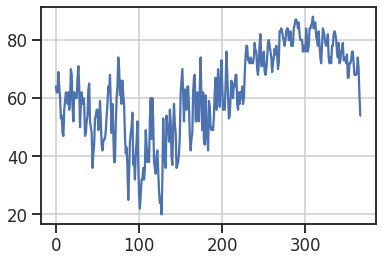

In [105]:
weather_data.mean_temp.plot().grid();

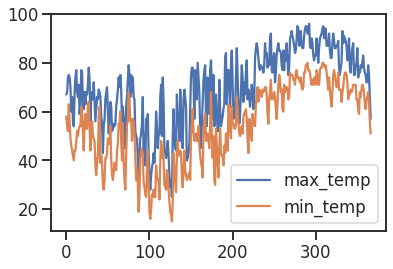

In [106]:
weather_data[['max_temp','min_temp']].plot(subplots=False);

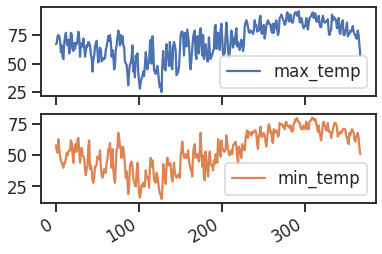

In [107]:
new_weather_data = weather_data[['max_temp','min_temp']]
new_weather_data.plot(subplots=True);

We can specify column labels in the loc method to retrieve columns by label instead of by position:

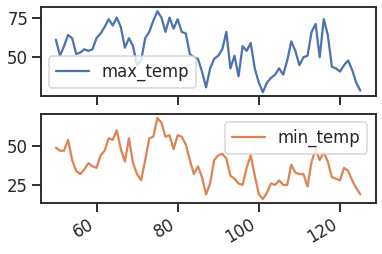

In [108]:
new_weather_data = weather_data.loc[50:125,['max_temp','min_temp']]
new_weather_data.plot(subplots=True);

The <font color='red'>plot()</font> function returns a matplotlib <font color='red'>AxesSubPlot</font> object. You can pass this object into subsequent calls to plot() in order to compose plots.

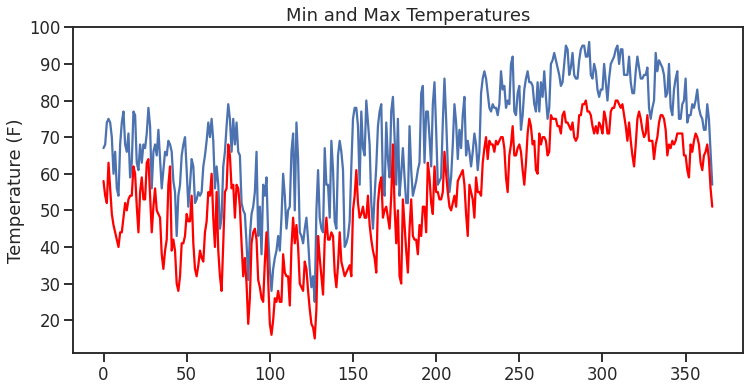

In [109]:
ax = weather_data.max_temp.plot(title="Min and Max Temperatures", 
                                figsize=(12,6));
weather_data.min_temp.plot(style="red", ax=ax);
ax.set_ylabel("Temperature (F)");

Perform scatter plot:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


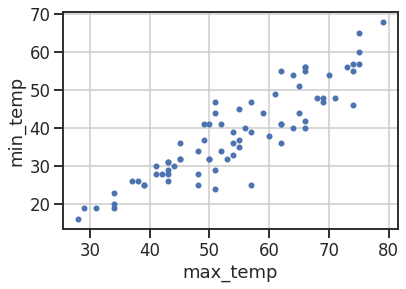

In [111]:
new_weather_data.plot(kind='scatter', x='max_temp', y='min_temp').grid();

## <font color="blue">Climate data</font>

### <center>Global Surface Temperature Change based on Land and Ocean Data</center>
<center>Reference http://pubs.giss.nasa.gov/docs/2010/2010_Hansen_ha00510u.pdf</center>

#### Pandas  <font color='red'>read_table</font>

In [112]:
url = "https://raw.githubusercontent.com/astg606/py_materials/master/pandas/data/temperatures/"
filename = "annual.land_ocean.90S.90N.df_1880-2016mean.dat"
tsurf = pd.read_table(url+filename)
print(type(tsurf))

<class 'pandas.core.frame.DataFrame'>


In [113]:
print(tsurf)

     Land-Ocean Temperature Index (C)
0    --------------------------------
1        Year No_Smoothing  Lowess(5)
2        ----------------------------
3            1880     -0.20     -0.13
4            1881     -0.12     -0.15
..                                ...
135          2012      0.64      0.69
136          2013      0.66      0.72
137          2014      0.75      0.76
138          2015      0.87      0.79
139                    2016      -999

[140 rows x 1 columns]


There is only 1 column! Let's reformat the data noting that there is a header and values are separated by any number of spaces.

### Data wrangling

> Data Wrangling is the process of converting and mapping data from its raw form to another format with the purpose of making it more valuable and appropriate for advance tasks such as Data Analytics and Machine Learning.

In [114]:
tsurf = pd.read_table(url+filename, skiprows=5, sep="\s+")
tsurf

,1880,-0.20,-0.13
0,1881,-0.12,-0.15
1,1882,-0.10,-0.18
2,1883,-0.20,-0.21
3,1884,-0.28,-0.24
4,1885,-0.31,-0.26
...,...,...,...
131,2012,0.64,0.69
132,2013,0.66,0.72
133,2014,0.75,0.76
134,2015,0.87,0.79


There are columns but the column names are: 1880, -0.20, -0.13

In [115]:
tsurf = pd.read_table(url+filename, skiprows=5, sep="\s+", \
                      names=["year", "mean_anom", "with_smoothing"])
tsurf

,year,mean_anom,with_smoothing
0,1880,-0.20,-0.13
1,1881,-0.12,-0.15
2,1882,-0.10,-0.18
3,1883,-0.20,-0.21
4,1884,-0.28,-0.24
...,...,...,...
132,2012,0.64,0.69
133,2013,0.66,0.72
134,2014,0.75,0.76
135,2015,0.87,0.79


We only have 3 columns, one of which is the year of the record. Let use that as the index using the `index_col` option:

In [116]:
tsurf = pd.read_table(url+filename, skiprows=5, sep="\s+", \
                      names=["year", "mean_anom", "with_smoothing"], 
                      index_col=0)
tsurf

,mean_anom,with_smoothing
year,,
1880,-0.20,-0.13
1881,-0.12,-0.15
1882,-0.10,-0.18
1883,-0.20,-0.21
1884,-0.28,-0.24
...,...,...
2012,0.64,0.69
2013,0.66,0.72
2014,0.75,0.76


Furthermore the index is made of dates. Let's make that explicit:

In [117]:
tsurf = pd.read_table(url+filename, skiprows=5, sep="\s+", \
                      names=["year", "mean_anom", "with_smoothing"], 
                      index_col=0, parse_dates=True)
tsurf

,mean_anom,with_smoothing
year,,
1880-01-01,-0.20,-0.13
1881-01-01,-0.12,-0.15
1882-01-01,-0.10,-0.18
1883-01-01,-0.20,-0.21
1884-01-01,-0.28,-0.24
...,...,...
2012-01-01,0.64,0.69
2013-01-01,0.66,0.72
2014-01-01,0.75,0.76


### Dealing with missing values

In [118]:
tsurf.tail()

,mean_anom,with_smoothing
year,,
2012-01-01,0.64,0.69
2013-01-01,0.66,0.72
2014-01-01,0.75,0.76
2015-01-01,0.87,0.79
2016-01-01,-999.00,NaN


Convert to missing values to `NaN` values:

In [119]:
tsurf[tsurf == -999.000] = np.nan
tsurf.tail()

,mean_anom,with_smoothing
year,,
2012-01-01,0.64,0.69
2013-01-01,0.66,0.72
2014-01-01,0.75,0.76
2015-01-01,0.87,0.79
2016-01-01,NaN,NaN


Remove NaN values:

In [120]:
tsurf.dropna().tail()

,mean_anom,with_smoothing
year,,
2011-01-01,0.61,0.66
2012-01-01,0.64,0.69
2013-01-01,0.66,0.72
2014-01-01,0.75,0.76
2015-01-01,0.87,0.79


### Visualization

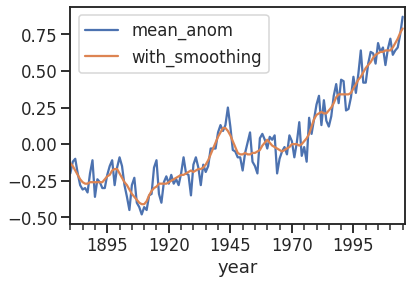

In [121]:
tsurf.plot()

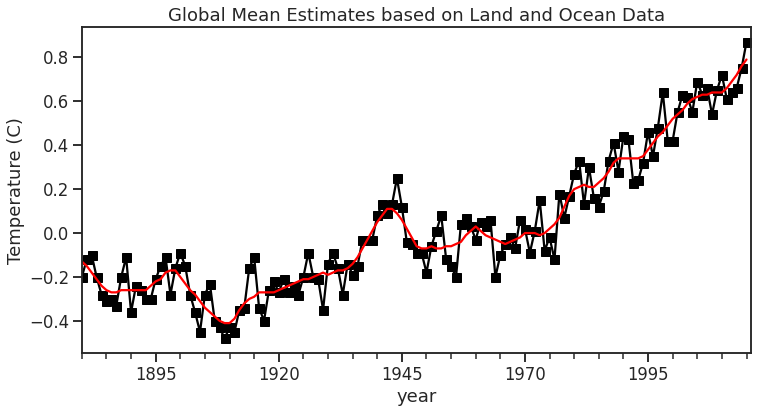

In [122]:
ax = tsurf.mean_anom.plot(style="black", 
                          title="Global Mean Estimates based on Land and Ocean Data", 
                          marker='s',
                          figsize=(12,6));
tsurf.with_smoothing.plot(style="red", ax=ax);
ax.set_ylabel("Temperature (C)");

In [123]:
import webbrowser
url = 'http://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.html'
webbrowser.open(url)

False

## <font color="red"> Exercise </font>
* Read the weather data so that the indices are the dates
* Plot the max and min tempatures on the same axes with the dates (ranging from November to March) as x-axis.

In [124]:
weather_data1 = weather_data
weather_data1

,date,max_temp,mean_temp,min_temp,max_dew,mean_dew,min_dew,max_humidity,mean_humidity,min_humidity,max_pressure,mean_pressure,min_pressure,max_visibilty,mean_visibility,min_visibility,max_wind,mean_wind,min_wind,precipitation,cloud_cover,events,wind_dir
0,2015-10-10,67,64,58,64,57,50,94,78,64,30.11,30.04,29.95,10,10,8,24,13,29.0,0.00,7,Rain,15
1,2015-10-11,68,62,54,56,54,51,89,76,64,30.03,29.97,29.92,10,10,9,14,11,18.0,0.00,5,NaN,14
2,2015-10-12,74,62,52,62,56,51,96,80,45,29.92,29.85,29.74,10,10,9,9,4,NaN,0.00,1,NaN,108
3,2015-10-13,75,69,63,63,61,59,87,75,60,29.73,29.68,29.62,10,10,9,20,12,24.0,0.00,1,NaN,211
4,2015-10-14,74,64,56,62,54,50,96,71,46,29.95,29.84,29.74,10,10,10,13,7,20.0,0.00,1,NaN,314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-10-6,72,69,66,68,65,61,94,88,80,30.23,30.20,30.18,10,10,10,18,14,23.0,0.01,8,Rain,44
363,2016-10-7,79,74,68,70,68,66,94,87,73,30.20,30.14,30.06,10,10,10,20,16,26.0,0.00,4,NaN,77
364,2016-10-8,75,70,64,72,68,64,100,96,83,30.04,29.81,29.70,10,4,1,37,19,53.0,6.68,6,Rain-Thunderstorm,43
365,2016-10-9,66,61,56,66,59,42,100,86,51,30.14,29.78,29.65,10,6,2,39,26,55.0,2.42,7,Rain,8


In [125]:
weather_data1.set_index("date",inplace=True)
weather_data1

,max_temp,mean_temp,min_temp,max_dew,mean_dew,min_dew,max_humidity,mean_humidity,min_humidity,max_pressure,mean_pressure,min_pressure,max_visibilty,mean_visibility,min_visibility,max_wind,mean_wind,min_wind,precipitation,cloud_cover,events,wind_dir
date,,,,,,,,,,,,,,,,,,,,,,
2015-10-10,67,64,58,64,57,50,94,78,64,30.11,30.04,29.95,10,10,8,24,13,29.0,0.00,7,Rain,15
2015-10-11,68,62,54,56,54,51,89,76,64,30.03,29.97,29.92,10,10,9,14,11,18.0,0.00,5,NaN,14
2015-10-12,74,62,52,62,56,51,96,80,45,29.92,29.85,29.74,10,10,9,9,4,NaN,0.00,1,NaN,108
2015-10-13,75,69,63,63,61,59,87,75,60,29.73,29.68,29.62,10,10,9,20,12,24.0,0.00,1,NaN,211
2015-10-14,74,64,56,62,54,50,96,71,46,29.95,29.84,29.74,10,10,10,13,7,20.0,0.00,1,NaN,314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-6,72,69,66,68,65,61,94,88,80,30.23,30.20,30.18,10,10,10,18,14,23.0,0.01,8,Rain,44
2016-10-7,79,74,68,70,68,66,94,87,73,30.20,30.14,30.06,10,10,10,20,16,26.0,0.00,4,NaN,77
2016-10-8,75,70,64,72,68,64,100,96,83,30.04,29.81,29.70,10,4,1,37,19,53.0,6.68,6,Rain-Thunderstorm,43


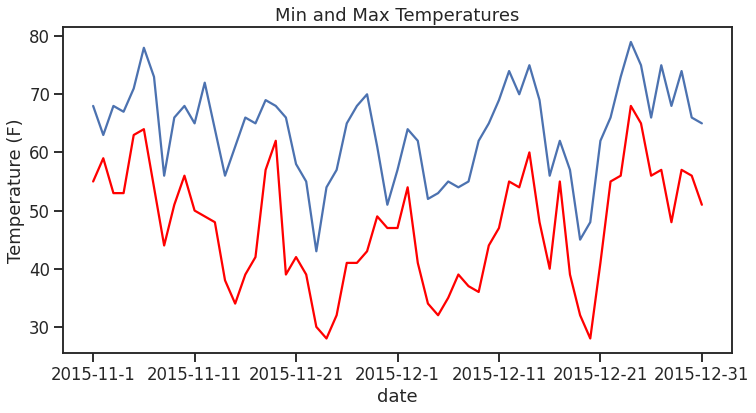

In [126]:

df = weather_data1[(weather_data1.index > '2015-11-01') & \
                   (weather_data1.index <= '2016-03-31')]
ax = df.max_temp.plot(title="Min and Max Temperatures", 
                                figsize=(12,6));
df.min_temp.plot(style="red", ax=ax);
ax.set_ylabel("Temperature (F)");

## <font color="blue">Arctic Oscillation and North Atlantic Oscillation  Datasets</font>

- The <a href="https://en.wikipedia.org/wiki/Arctic_oscillation">Arctic oscillation (AO)</a> or Northern Annular Mode/Northern Hemisphere Annular Mode (NAM) is a weather phenomenon at the Arctic poles north of 20 degrees latitude. It is an important mode of climate variability for the Northern Hemisphere.
- The <a href="https://en.wikipedia.org/wiki/North_Atlantic_oscillation">North Atlantic Oscillation (NAO)</a> is a weather phenomenon in the North Atlantic Ocean of fluctuations in the difference of atmospheric pressure at sea level (SLP) between the Icelandic Low and the Azores High. 

In [127]:
ao_url = "http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii"
nao_url = "http://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii"

Read the North Atlantic Oscillation (NAO) data as a Pandas dataframe by combining Columns 0 & 1 and parsing it as a single date column.

In [128]:
nao_df = pd.read_table(nao_url, sep='\s+', 
                       parse_dates={'dates':[0, 1]}, 
                       header=None, index_col=0, squeeze=True)
nao_df

dates
1950-01-01    0.92000
1950-02-01    0.40000
1950-03-01   -0.36000
1950-04-01    0.73000
1950-05-01   -0.59000
               ...   
2020-10-01   -0.65471
2020-11-01    2.54450
2020-12-01   -0.30240
2021-01-01   -1.10870
2021-02-01    0.13610
Name: 2, Length: 854, dtype: float64

Read the Atlantic Oscillation (AO) data as a Pandas dataframe by combining Columns 0 & 1 and parsing it as a single date column.

In [129]:
ao_df = pd.read_table(ao_url, sep='\s+', 
                      parse_dates={'dates':[0, 1]}, 
                      header=None, index_col=0, squeeze=True)
ao_df

dates
1950-01-01   -0.060310
1950-02-01    0.626810
1950-03-01   -0.008128
1950-04-01    0.555100
1950-05-01    0.071577
                ...   
2020-10-01   -0.071711
2020-11-01    2.086400
2020-12-01   -1.736000
2021-01-01   -2.483600
2021-02-01   -1.190700
Name: 2, Length: 854, dtype: float64

Create a Pandas DataFrame by combining the two Pandas Series. 

Note that the frequency of the data is one month (`freq='M'`).

In [130]:
aonao_df = pd.DataFrame({'AO':ao_df.to_period(freq='M'), 
                         'NAO':nao_df.to_period(freq='M')})
aonao_df

,AO,NAO
dates,,
1950-01,-0.060310,0.92000
1950-02,0.626810,0.40000
1950-03,-0.008128,-0.36000
1950-04,0.555100,0.73000
1950-05,0.071577,-0.59000
...,...,...
2020-10,-0.071711,-0.65471
2020-11,2.086400,2.54450
2020-12,-1.736000,-0.30240


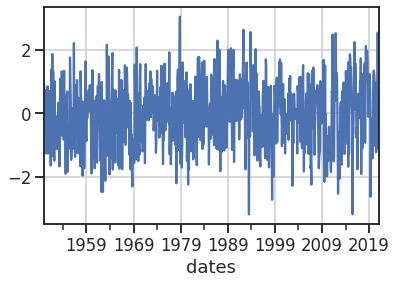

In [132]:
aonao_df.NAO.plot().grid();

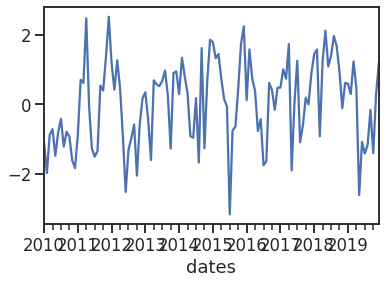

In [133]:
aonao_df.NAO['2010':'2019'].plot();

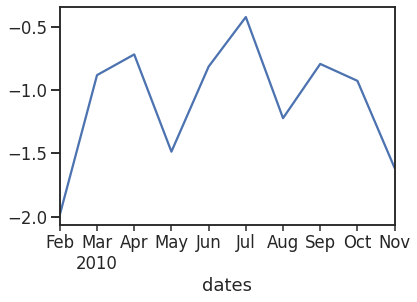

In [134]:
aonao_df.NAO['2010-02':'2010-11'].plot();

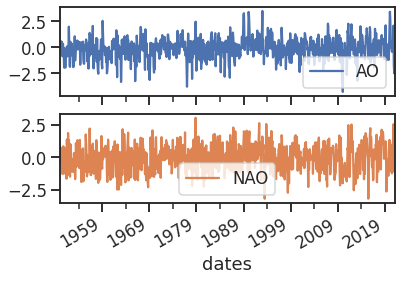

In [135]:
aonao_df.plot(subplots=True);

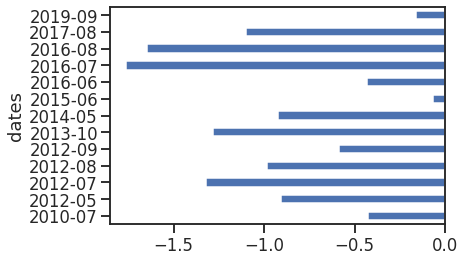

In [136]:
aonao_df.loc[(aonao_df.AO > 0) & (aonao_df.NAO < 0) 
                               & (aonao_df.index > '2010-01') 
                               & (aonao_df.index < '2020-01'), 'NAO'].plot(kind='barh');

#### Resampling

- Pandas provide easy way to resample data to different time frequency. 
- Two main parameters for resampling:
     1. Time period you resample to 
     2. The method that you use. By default the method is mean. 
     
In the example below we calculate the annual mean ("A").

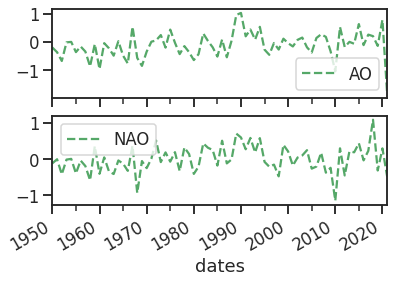

In [137]:
aonao_df_mm = aonao_df.resample("A").mean()
aonao_df_mm.plot(style='g--', subplots=True);

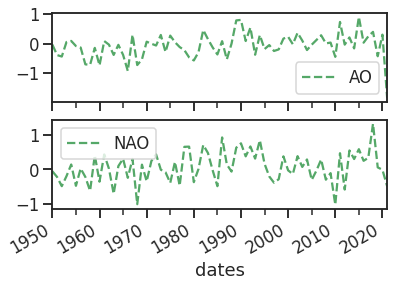

In [138]:
aonao_df_mm = aonao_df.resample("A").median()
aonao_df_mm.plot(style='g--', subplots=True);

You can use your methods for resampling, for example `np.max` (in this case we change resampling frequency to 3 years):

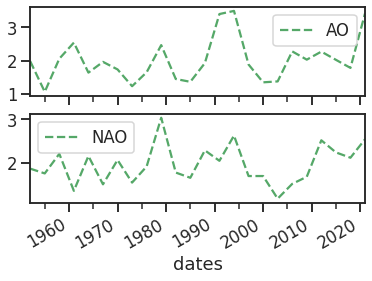

In [139]:
aonao_df_mm = aonao_df.resample("3A").apply(np.max)
aonao_df_mm.plot(style='g--', subplots=True);

You can specify several functions at once as a list:

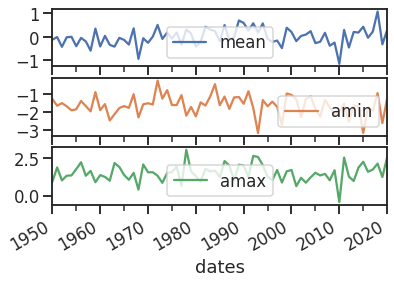

In [140]:
aonao_df_mm = aonao_df.NAO.resample("A").apply(['mean', np.min, np.max])
aonao_df_mm['1900':'2020'].plot(subplots=True);

#### Group By

Process that involves one or more of the steps:

- Splitting the data into groups based on some criteria.
- Applying a function to each group independently.
- Combining the results into a data structure.

Group by year:

In [141]:
aonao_df_gb_year = aonao_df.groupby(by=[aonao_df.index.year]).mean()
aonao_df_gb_year

,AO,NAO
dates,,
1950,-0.199501,-0.120833
1951,-0.364626,-0.008333
1952,-0.674990,-0.425000
1953,-0.016515,-0.017500
1954,-0.000770,0.002500
...,...,...
2017,0.256308,0.224532
2018,0.202732,1.083986
2019,-0.142024,-0.318448


In [142]:
aonao_df.groupby(pd.Grouper(freq='A')).mean()

,AO,NAO
dates,,
1950,-0.199501,-0.120833
1951,-0.364626,-0.008333
1952,-0.674990,-0.425000
1953,-0.016515,-0.017500
1954,-0.000770,0.002500
...,...,...
2017,0.256308,0.224532
2018,0.202732,1.083986
2019,-0.142024,-0.318448


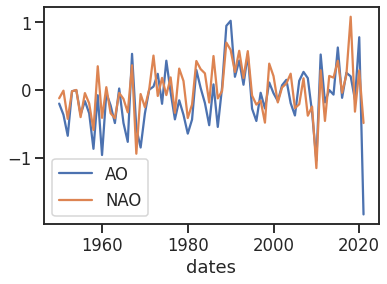

In [143]:
aonao_df_gb_year.plot()

Group by month:

In [144]:
aonao_df_gb_month = aonao_df.groupby(by=[aonao_df.index.month]).mean()
aonao_df_gb_month

,AO,NAO
dates,,
1,-0.379201,0.124259
2,-0.344394,0.124301
3,-0.071921,0.059064
4,0.113172,0.122863
5,-0.002487,-0.114317
...,...,...
8,-0.132624,-0.140242
9,0.008535,0.058049
10,-0.017952,-0.196754


In [145]:
aonao_df.groupby(pd.Grouper(freq='M')).mean()

,AO,NAO
dates,,
1950-01,-0.060310,0.92000
1950-02,0.626810,0.40000
1950-03,-0.008128,-0.36000
1950-04,0.555100,0.73000
1950-05,0.071577,-0.59000
...,...,...
2020-10,-0.071711,-0.65471
2020-11,2.086400,2.54450
2020-12,-1.736000,-0.30240


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9231cfc7d0>,
      dtype=object)

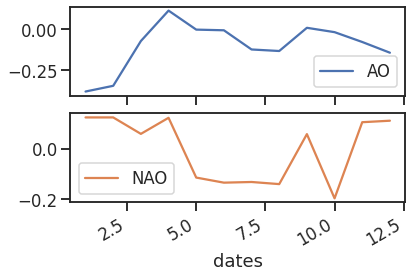

In [146]:
aonao_df_gb_month.plot(subplots=True)

Quarterly Data:

In [147]:
aonao_df.groupby(pd.Grouper(freq='Q')).mean()

,AO,NAO
dates,,
1950Q1,0.186124,0.320000
1950Q2,0.388416,0.026667
1950Q3,-0.431840,-0.353333
1950Q4,-0.940703,-0.476667
1951Q1,-0.806333,-0.080000
...,...,...
2020Q1,2.825867,1.204267
2020Q2,0.259752,-0.526387
2020Q3,-0.053857,-0.039827


## <font color="blue">Web Scraping Sea Level Data</font>

The [Permanent Service for Mean Sea Level](http://www.psmsl.org/) (PSMSL) website contains Mean Sea Level (MSL) data from stations around the world. Here we download and parse all tables in a webpage, and again we just give `read_html` the URL to parse:

#### Pandas  <font color='red'>read_html</font>

In [148]:
# Needs `lxml`, `beautifulSoup4` and `html5lib` python packages
table_list = pd.read_html("http://www.psmsl.org/data/obtaining/")

In [149]:
type(table_list)

list

In [150]:
len(table_list)

1

In [151]:
table_list[-1]

,Station Name,ID,Lat.,Lon.,GLOSS ID,Country,Date,Coastline,Station
0,BREST,1,48.383,-4.495,242.0,FRA,09/11/2020,190,91
1,SWINOUJSCIE,2,53.917,14.233,NaN,POL,19/10/2001,110,92
2,SHEERNESS,3,51.446,0.743,NaN,GBR,06/06/2019,170,101
3,HOLYHEAD,5,53.314,-4.620,NaN,GBR,13/08/2020,170,191
4,CUXHAVEN 2,7,53.867,8.717,284.0,DEU,01/10/2019,140,12
...,...,...,...,...,...,...,...,...,...
1543,ST LAWRENCE,2354,46.917,-55.390,NaN,CAN,01/10/2020,970,113
1544,SUVA-B,2356,-18.133,178.428,NaN,FJI,03/02/2021,742,14
1545,SYDNEY PORT JACKSON,2358,-33.826,151.259,NaN,AUS,13/06/2019,680,138
1546,ARKO,2359,58.484,16.961,NaN,SWE,25/02/2021,50,112


There is 1 table on that page which contains metadata about the stations where sea levels are recorded:

In [152]:
local_sea_level_stations = table_list[0]
local_sea_level_stations

,Station Name,ID,Lat.,Lon.,GLOSS ID,Country,Date,Coastline,Station
0,BREST,1,48.383,-4.495,242.0,FRA,09/11/2020,190,91
1,SWINOUJSCIE,2,53.917,14.233,NaN,POL,19/10/2001,110,92
2,SHEERNESS,3,51.446,0.743,NaN,GBR,06/06/2019,170,101
3,HOLYHEAD,5,53.314,-4.620,NaN,GBR,13/08/2020,170,191
4,CUXHAVEN 2,7,53.867,8.717,284.0,DEU,01/10/2019,140,12
...,...,...,...,...,...,...,...,...,...
1543,ST LAWRENCE,2354,46.917,-55.390,NaN,CAN,01/10/2020,970,113
1544,SUVA-B,2356,-18.133,178.428,NaN,FJI,03/02/2021,742,14
1545,SYDNEY PORT JACKSON,2358,-33.826,151.259,NaN,AUS,13/06/2019,680,138
1546,ARKO,2359,58.484,16.961,NaN,SWE,25/02/2021,50,112


That table can be used to search for a station in a region of the world we choose, extract an ID for it and download the corresponding time series with the URL:

```python
http://www.psmsl.org/data/obtaining/met.monthly.data/< ID >.metdata
```

The datasets that we obtain straight from the reading functions are pretty raw. A lot of pre-processing can be done during data read but we haven't used all the power of the reading functions. 

The columns of the local_sea_level_stations aren't clean. they contain spaces and dots.

In [153]:
local_sea_level_stations.columns

Index(['Station Name', 'ID', 'Lat.', 'Lon.', 'GLOSS ID', 'Country', 'Date',
       'Coastline', 'Station'],
      dtype='object')

We can clean up by removing the `.` and any white space from column name:

In [154]:
local_sea_level_stations.columns = [name.strip().replace(".", "") 
                                    for name in local_sea_level_stations.columns]
local_sea_level_stations.columns

Index(['Station Name', 'ID', 'Lat', 'Lon', 'GLOSS ID', 'Country', 'Date',
       'Coastline', 'Station'],
      dtype='object')

In [155]:
local_sea_level_stations.columns = [name.strip().replace(" ", "_") 
                                    for name in local_sea_level_stations.columns]
local_sea_level_stations.columns

Index(['Station_Name', 'ID', 'Lat', 'Lon', 'GLOSS_ID', 'Country', 'Date',
       'Coastline', 'Station'],
      dtype='object')

Let us only consider the latitude, longitude, country and date:

In [156]:
selected_columns = ['ID', 'Lat', 'Lon', 'Country', 'Date']
msl_data = local_sea_level_stations[selected_columns]
msl_data

,ID,Lat,Lon,Country,Date
0,1,48.383,-4.495,FRA,09/11/2020
1,2,53.917,14.233,POL,19/10/2001
2,3,51.446,0.743,GBR,06/06/2019
3,5,53.314,-4.620,GBR,13/08/2020
4,7,53.867,8.717,DEU,01/10/2019
...,...,...,...,...,...
1543,2354,46.917,-55.390,CAN,01/10/2020
1544,2356,-18.133,178.428,FJI,03/02/2021
1545,2358,-33.826,151.259,AUS,13/06/2019
1546,2359,58.484,16.961,SWE,25/02/2021


We can now plot locations of the stations on a map:

[Text(0.5, 1.0, 'Location of the Lat/Lon of MSL stations')]

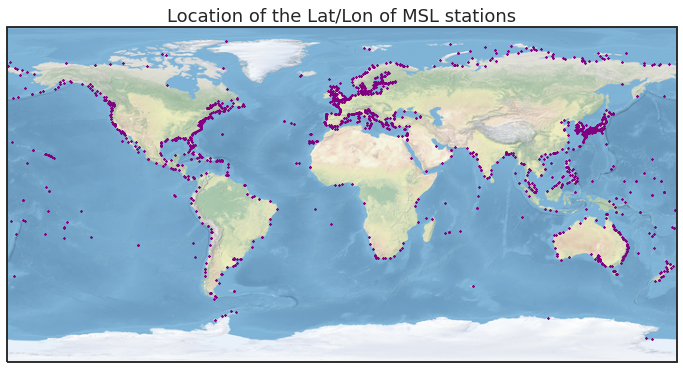

In [159]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(12, 9))
map_projection = ccrs.PlateCarree()
data_transform = ccrs.PlateCarree()

ax = plt.axes(projection=map_projection)
ax.stock_img()

# Plot the selected location 
plt.plot(msl_data.Lon, msl_data.Lat, 'r*', 
         transform=data_transform, color="purple", markersize=2)

ax.set(title="Location of the Lat/Lon of MSL stations")

Change the `Date` as datetime object and move it as index:

In [160]:
msl_data['Date'] = pd.to_datetime(msl_data.Date, format="%d/%m/%Y")
msl_data = msl_data.set_index(['Date'])
msl_data

,ID,Lat,Lon,Country
Date,,,,
2020-11-09,1,48.383,-4.495,FRA
2001-10-19,2,53.917,14.233,POL
2019-06-06,3,51.446,0.743,GBR
2020-08-13,5,53.314,-4.620,GBR
2019-10-01,7,53.867,8.717,DEU
...,...,...,...,...
2020-10-01,2354,46.917,-55.390,CAN
2021-02-03,2356,-18.133,178.428,FJI
2019-06-13,2358,-33.826,151.259,AUS


We can now group the measurements by country:

In [161]:
grp_msl_data = msl_data.groupby("Country")
grp_msl_data

In [162]:
num_stations = 0
for key, item in grp_msl_data:
    print("Country: {} -- {:>4} Stations".format(key, len(item)))
    num_stations += len(item)
    #print("{}".format(item))
    #print()
    
print("{} stations in total.".format(num_stations))

Country: ALA --    4 Stations
Country: ARG --   15 Stations
Country: ASM --    1 Stations
Country: ATA --    8 Stations
Country: ATF --    1 Stations
Country: AUS --   93 Stations
Country: BEL --    3 Stations
Country: BGD --    5 Stations
Country: BGR --    2 Stations
Country: BHR --    1 Stations
Country: BHS --    2 Stations
Country: BMU --    2 Stations
Country: BRA --   12 Stations
Country: CAN --   85 Stations
Country: CCK --    1 Stations
Country: CHL --   21 Stations
Country: CHN --   17 Stations
Country: CIV --    1 Stations
Country: COG --    1 Stations
Country: COK --    2 Stations
Country: COL --    4 Stations
Country: CPV --    2 Stations
Country: CRI --    4 Stations
Country: CUB --   12 Stations
Country: CYM --    2 Stations
Country: CYP --    2 Stations
Country: DEU --    9 Stations
Country: DNK --   15 Stations
Country: DOM --    2 Stations
Country: ECU --    5 Stations
Country: EGY --    2 Stations
Country: ESP --   65 Stations
Country: EST --    2 Stations
Country: F

Select data for USA:

In [163]:
msl_usa = grp_msl_data.get_group('USA')
msl_usa

,ID,Lat,Lon,Country
Date,,,,
2021-02-02,10,37.807,-122.465,USA
2021-02-02,12,40.700,-74.013,USA
2021-02-02,112,30.672,-81.465,USA
2021-02-02,127,47.602,-122.338,USA
2021-02-02,135,39.933,-75.142,USA
...,...,...,...,...
2021-02-02,2326,30.398,-81.428,USA
2021-02-02,2327,30.705,-88.040,USA
2021-02-02,2328,30.027,-90.113,USA


In [164]:
stationID = msl_usa.ID[-1]

In [165]:
from datetime import datetime, timedelta

def convert_to_datetime(year_dec):
    year_int = int(float(year_dec))
    base = datetime(year_int, 1, 1)
    rem = float(year_dec) - year_int
    result = base + \
             timedelta(seconds=(base.replace(year=base.year + 1) - base).total_seconds() * rem)
    #print(result.strftime("%Y-%m-%d"))
    return result

x = 1985.2917
convert_to_datetime(x).strftime("%Y-%m-%d") 

'1985-04-17'

In [166]:
url = f"https://www.psmsl.org/data/obtaining/met.monthly.data/{stationID}.rlrdata"
print(url)
monthly_data = pd.read_csv(url, sep=";", 
                           names=["monthly_mean_sl"],
                          parse_dates={'Dates': [0]}, 
                          date_parser=convert_to_datetime,
                           infer_datetime_format=True,
                          na_values=-99999, header=None, 
                          index_col=0, squeeze=True)

annual_data

https://www.psmsl.org/data/obtaining/met.monthly.data/2330.rlrdata


HTTPError: ignored

##  <font color="blue">Global Temperature Climatology</font>

Let's load a different file with temperature data. NASA's GISS dataset is written in chunks: look at it in `data/temperatures/GLB.Ts+dSST.txt`

In [ ]:
#!head data/temperatures/GLB.Ts+dSST.txt

In [ ]:
url = "https://raw.githubusercontent.com/astg606/py_materials/master/pandas/data/temperatures/"

giss_temp = pd.read_csv(url+"GLB.Ts+dSST.txt", 
                        skiprows=7, 
                        skipfooter=11, 
                        sep="\s+")
print(type(giss_temp))
giss_temp

In [ ]:
# Internal nature of the object
print(giss_temp.shape)
print(giss_temp.dtypes)

Descriptors for the vertical axis (axis=0)

In [ ]:
print(giss_temp.index)

Descriptors for the horizontal axis (axis=1)

In [ ]:
giss_temp.columns

#### Recall: every column is a Series

A lot of information at once including memory usage:

In [ ]:
giss_temp.info()

### Setting the index

In [ ]:
# We didn't set a column number of the index of giss_temp, 
# we can do that after we have read the data:
giss_temp = giss_temp.set_index("Year")
giss_temp.head()

Note Year.1 column is redundant

### Dropping rows and columns

In [ ]:
giss_temp.columns

In [ ]:
# Let's drop it:
giss_temp = giss_temp.drop("Year.1", axis=1) # axis=1 is the data axis
giss_temp

In [ ]:
# We can also just select the columns we want to keep 
# (another way to drop columns)
giss_temp = giss_temp[[u'Jan', u'Feb', u'Mar', u'Apr', 
                       u'May', u'Jun', u'Jul', u'Aug', 
                       u'Sep', u'Oct', u'Nov', u'Dec']]
# Note how we passed a List of column names

giss_temp

In [ ]:
# Let's remove the last row (Year  Jan ...).
giss_temp = giss_temp.drop("Year")  # by  default drop() works on index axis (axis=0)
giss_temp

Let's also set `****` to a real missing value (`np.nan`). We can often do it using a boolean mask, but that may trigger pandas warning. Another way to assign based on a boolean condition is to use the `where` method:

In [ ]:
#giss_temp[giss_temp == "****"] = np.nan # WARNING due to memory layout

# use .where: replace the entries which do not satistfy the condition
giss_temp = giss_temp.where(giss_temp != "****", other=np.nan)

In [ ]:
giss_temp.tail()

Because of the labels (strings) found in the middle of the timeseries, every column only assumed to contain strings (didn't convert them to floating point values):

In [ ]:
giss_temp.dtypes

That can be changed after the fact (and after the cleanup) with the `astype` method of a `Series`:

In [ ]:
giss_temp["Jan"].astype("float32")

In [ ]:
# Loop over all columns that had 'Object' type and make them 'float32'
for col in giss_temp.columns:
    giss_temp[col] = giss_temp[col].astype(np.float32)

An index has a `dtype` just like any Series and that can be changed after the fact too.

In [ ]:
giss_temp.index.dtype

For now, let's change it to an integer so that values can at least be compared properly.

In [ ]:
giss_temp.index = giss_temp.index.astype(np.int32)

### Removing missing values

In [ ]:
# This will remove any year that has a missing value. 
# Use how='all' to keep partial years
giss_temp.dropna(how="all").tail()

In [ ]:
# Replace (fill) NaN with 0 (or some other value, like -999)
giss_temp.fillna(value=0).tail()

In [ ]:
# ffill = forward fill: This fills them with the previous year.
giss_temp.fillna(method="ffill").tail()

There is also a `.interpolate` method that works on a `Series`:

In [ ]:
giss_temp.Aug.interpolate().tail()

For now, we will leave the missing values in all our datasets, because it wouldn't be meaningful to fill them.

### Visualization

In [ ]:
giss_temp.Jan.plot(figsize=LARGE_FIGSIZE);

In [ ]:
# A boxplot
giss_temp.boxplot();

## <font color="red">Storing our Work</font>

For each `read_**` function to load data, there is a `to_**` method attached to Series and DataFrames.

Another file format that is commonly used is Excel.

Multiple datasets can be stored in 1 file.

In [ ]:
writer = pd.ExcelWriter("test.xls")

In [ ]:
giss_temp.to_excel(writer, sheet_name="GISS temp data")
tsurf.to_excel(writer, sheet_name="NASA sst anom data")

In [ ]:
writer.close()

Another, more powerful file format to store binary data, which allows us to store both `Series` and `DataFrame`s without having to cast anybody is HDF5.

In [ ]:
with pd.HDFStore("all_data.h5") as writer:
    giss_temp.to_hdf(writer, "/temperatures/giss")
    tsurf.to_hdf(writer, "/temperatures/anomalies")
    mean_sea_level.to_hdf(writer, "/sea_level/mean_sea_level")
    local_sea_level_stations.to_hdf(writer, "/sea_level/stations")

In [ ]:
%ls